# **데이터 불러오기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/월간 11 운동')

In [3]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

# **데이터 살펴보기**

In [4]:
train

id  time     acc_x  ...       gy_x        gy_y       gy_z
0           0     0  1.206087  ...  -0.591608  -30.549010 -31.676112
1           0     1  1.287696  ...   0.303100  -39.139103 -24.927216
2           0     2  1.304609  ...  -3.617278  -44.122565 -25.019629
3           0     3  1.293095  ...   2.712986  -53.597843 -27.454013
4           0     4  1.300887  ...   4.286707  -57.906561 -27.961234
...       ...   ...       ...  ...        ...         ...        ...
1874995  3124   595 -0.712530  ... -29.367857 -104.013664 -76.290437
1874996  3124   596 -0.683037  ... -30.149089 -101.796809 -76.625087
1874997  3124   597 -0.664730  ... -27.873095  -98.776072 -79.365125
1874998  3124   598 -0.630534  ... -23.636550  -99.139495 -80.259478
1874999  3124   599 -0.578351  ... -17.917626 -100.181873 -80.676229

[1875000 rows x 8 columns]

In [5]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [6]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

id  label                          label_desc
0        0     37           Shoulder Press (dumbbell)
1        1     26                        Non-Exercise
2        2      3                  Biceps Curl (band)
3        3     26                        Non-Exercise
4        4     26                        Non-Exercise
...    ...    ...                                 ...
3120  3120     26                        Non-Exercise
3121  3121     26                        Non-Exercise
3122  3122     15  Dynamic Stretch (at your own pace)
3123  3123     26                        Non-Exercise
3124  3124      2                          Bicep Curl

[3125 rows x 3 columns]

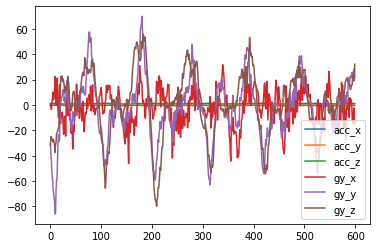

In [8]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

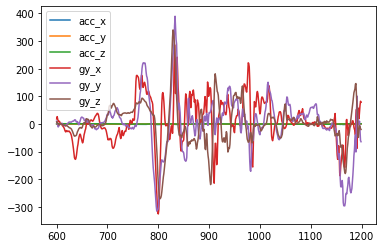

In [9]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

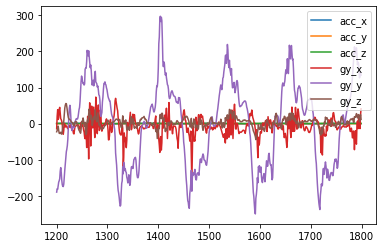

In [10]:
ex=train[train['id']==2]
ex.iloc[:,2:].plot()

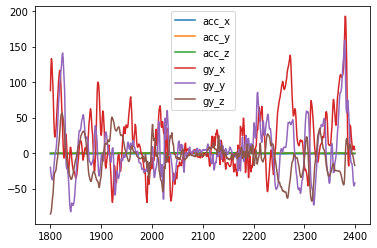

In [11]:
ex=train[train['id']==3]
ex.iloc[:,2:].plot()

In [14]:
#test'id'는 782개 
test['id'].nunique()

782

In [15]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

id  0  1  2  3  4  5  6  7  8  ...  51  52  53  54  55  56  57  58  59  60
0    3125  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
1    3126  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
2    3127  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
3    3128  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
4    3129  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
..    ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
777  3902  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
778  3903  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
779  3904  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
780  3905  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
781  3906  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0

[782 rows x 62 columns]

# **라이브러리 불러오기**

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

# **데이터 수정**

In [17]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [19]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

# **모델 학습 및 예측**

In [20]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 1s 31ms/step - loss: 1.1102 - accuracy: 0.6872 - val_loss: 2.6734 - val_accuracy: 0.4816
Epoch 2/30
20/20 [==============================] - 1s 30ms/step - loss: 1.1088 - accuracy: 0.6884 - val_loss: 2.6778 - val_accuracy: 0.4848
Epoch 3/30
20/20 [==============================] - 1s 29ms/step - loss: 1.1011 - accuracy: 0.6876 - val_loss: 2.6681 - val_accuracy: 0.4832
Epoch 4/30
20/20 [==============================] - 1s 29ms/step - loss: 1.0904 - accuracy: 0.6940 - val_loss: 2.7154 - val_accuracy: 0.4768
Epoch 5/30
20/20 [==============================] - 1s 29ms/step - loss: 1.0843 - accuracy: 0.6960 - val_loss: 2.7179 - val_accuracy: 0.4720
Epoch 6/30
20/20 [==============================] - 1s 29ms/step - loss: 1.0776 - accuracy: 0.6940 - val_loss: 2.6967 - val_accuracy: 0.4656
Epoch 7/30
20/20 [==============================] - 1s 30ms/step - loss: 1.0706 - accuracy: 0.7024 - val_loss: 2.7294 - val_accuracy: 0.4816
Epoch 8/30
20

In [23]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [24]:
prediction=model.predict(test_X)

In [25]:
prediction.shape

(782, 61)

# **제출**

In [26]:
submission

id  0  1  2  3  4  5  6  7  8  ...  51  52  53  54  55  56  57  58  59  60
0    3125  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
1    3126  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
2    3127  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
3    3128  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
4    3129  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
..    ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
777  3902  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
778  3903  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
779  3904  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
780  3905  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0
781  3906  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   0

[782 rows x 62 columns]

In [27]:
submission.iloc[:,1:]=prediction

In [28]:
submission

id             0         1  ...            58            59        60
0    3125  6.604693e-05  0.000598  ...  2.471068e-02  2.088945e-05  0.003730
1    3126  1.438758e-07  0.000005  ...  3.079428e-09  4.918908e-05  0.000006
2    3127  5.821843e-06  0.003414  ...  4.321903e-04  1.361670e-04  0.001785
3    3128  9.376590e-04  0.009855  ...  2.765553e-05  1.198030e-04  0.011086
4    3129  3.464476e-05  0.000035  ...  1.806750e-07  4.613138e-04  0.000001
..    ...           ...       ...  ...           ...           ...       ...
777  3902  3.762250e-05  0.010440  ...  4.981020e-09  2.887067e-01  0.000001
778  3903  1.129651e-04  0.027265  ...  5.095407e-08  1.558532e-02  0.000001
779  3904  3.262028e-06  0.000036  ...  4.200789e-04  1.370141e-08  0.004370
780  3905  2.067748e-01  0.006714  ...  2.458565e-07  7.842624e-02  0.000009
781  3906  2.384947e-06  0.000180  ...  2.135016e-05  2.506462e-04  0.001331

[782 rows x 62 columns]

In [29]:
submission.to_csv('baseline_submission.csv', index=False)